In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
print("Les colonnes suivantes sont présentent dans train et dans test:\n")
liste_colonnes=[]
for i in train.keys():
    if i in (test.keys()):
        liste_colonnes.append(i)
print(liste_colonnes)
print("- - - - - - - - -\n")
liste15=[]
print("Les colonnes suivantes sont présentent dans train mais pas dans test:\n")
for i in train.keys():
    if i not in (test.keys()):
        liste15.append(i)
print(liste15)
print("- - - - - - - - -\n")
liste16=[]
print("Les colonnes suivantes sont présentent dans test mais pas dans train:\n")
for i in test.keys():
    if i not in (train.keys()):
        liste16.append(i)
print(liste16)

Les colonnes suivantes sont présentent dans train et dans test:

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 

**Gestion des variables dont les valeurs manquantes représentent une absence**

In [8]:
No=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageCond','GarageQual']

for i in No:
    train[i]=train[i].fillna("No")
    
train.BsmtExposure=train.BsmtExposure.fillna("Nothing")

<AxesSubplot:>

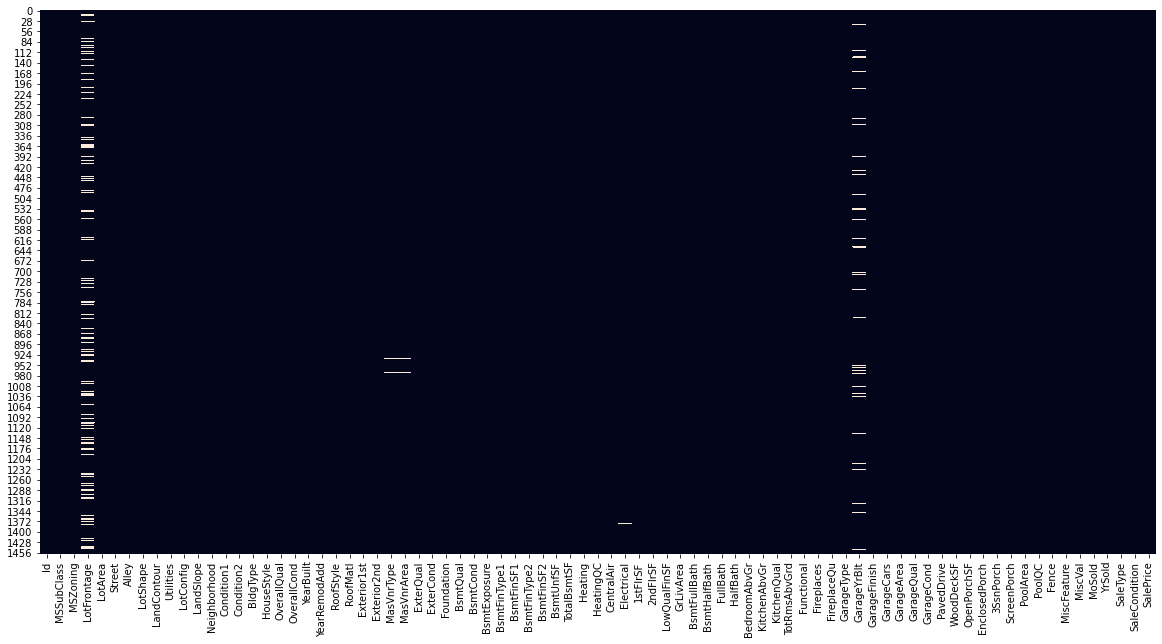

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(train.isna(),cbar=False)

**valeurs manquantes**

In [10]:
((train.isna().sum()/train.shape[0])*100).sort_values(ascending=False)[:10]

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
KitchenQual     0.000000
GarageType      0.000000
FireplaceQu     0.000000
Fireplaces      0.000000
Functional      0.000000
dtype: float64

In [11]:
train=train.drop(['LotFrontage','GarageYrBlt','Id'],axis=1)

In [12]:
train=train.dropna()

In [13]:
train.shape

(1451, 78)

In [14]:
train=train.reset_index()
train=train.drop(['index'],axis=1)

# Exploration des données

<AxesSubplot:>

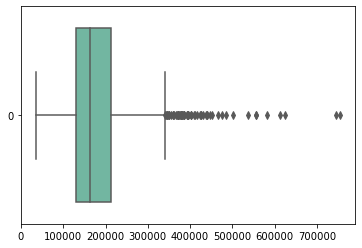

In [15]:
sns.boxplot(data=train['SalePrice'], orient="h",palette="Set2")

<AxesSubplot:>

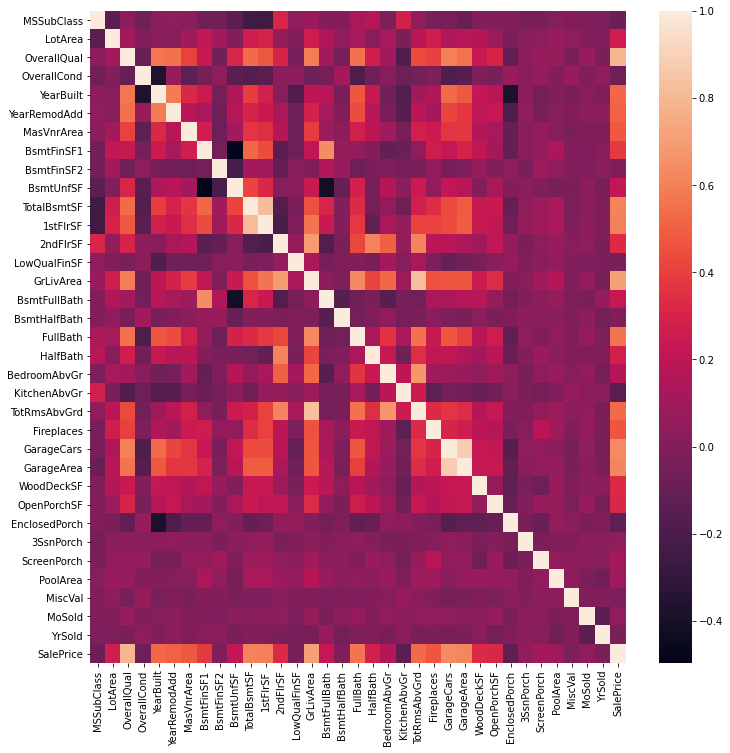

In [16]:
# On affiche la matrice de corrélation générale grace à heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(train.corr())

In [17]:
X=train.drop(['SalePrice'],axis=1)
y=train[['SalePrice']]

In [18]:
quantitatives = X.select_dtypes(['int64','float64']).columns
categorielles= X.select_dtypes(['object']).columns

MSSubClass


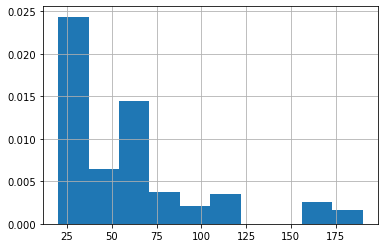

-----------------------------------------
LotArea


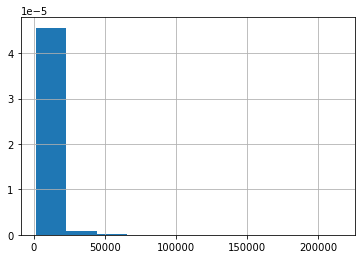

-----------------------------------------
OverallQual


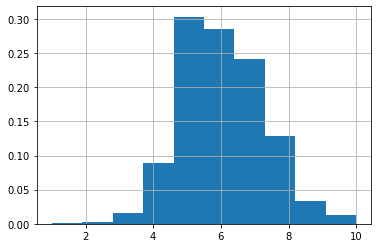

-----------------------------------------
OverallCond


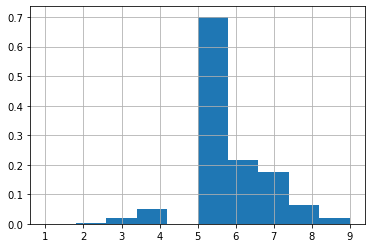

-----------------------------------------
YearBuilt


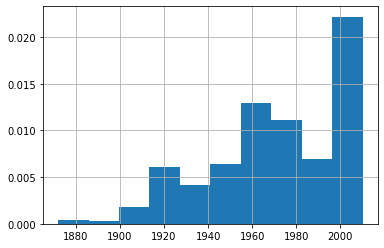

-----------------------------------------
YearRemodAdd


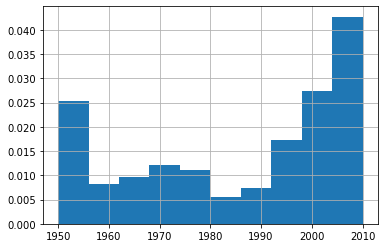

-----------------------------------------
MasVnrArea


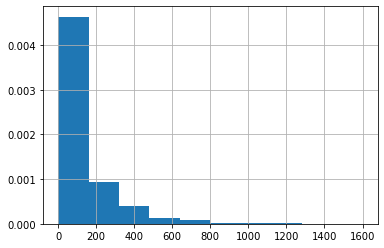

-----------------------------------------
BsmtFinSF1


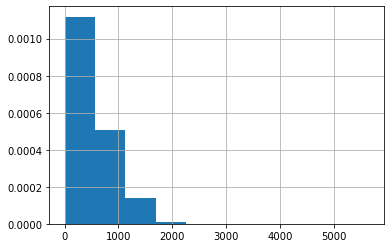

-----------------------------------------
BsmtFinSF2


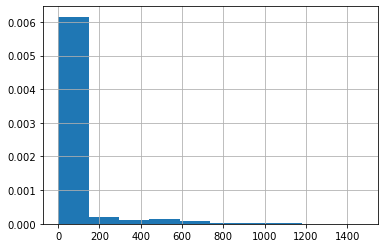

-----------------------------------------
BsmtUnfSF


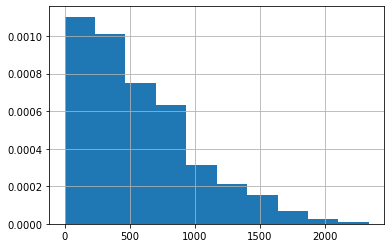

-----------------------------------------
TotalBsmtSF


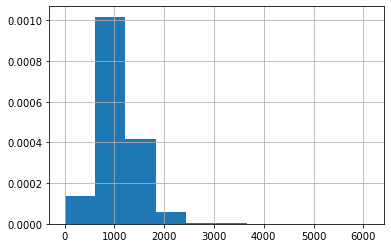

-----------------------------------------
1stFlrSF


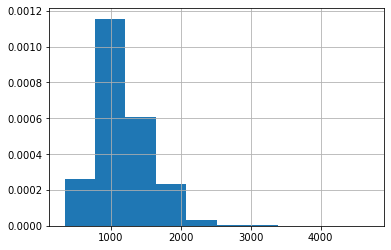

-----------------------------------------
2ndFlrSF


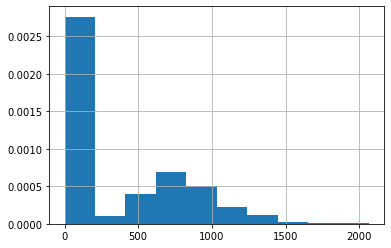

-----------------------------------------
LowQualFinSF


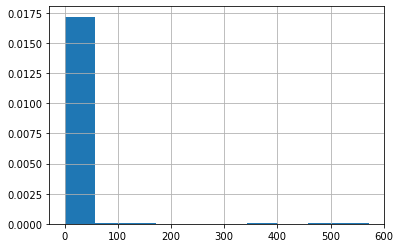

-----------------------------------------
GrLivArea


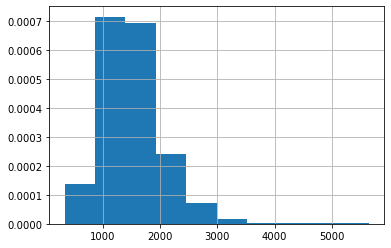

-----------------------------------------
BsmtFullBath


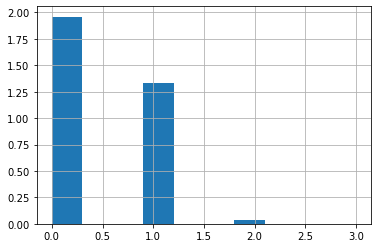

-----------------------------------------
BsmtHalfBath


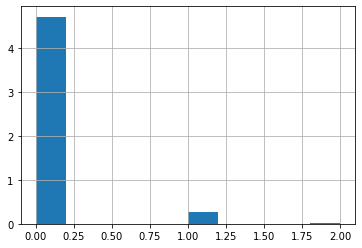

-----------------------------------------
FullBath


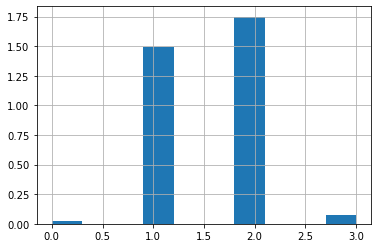

-----------------------------------------
HalfBath


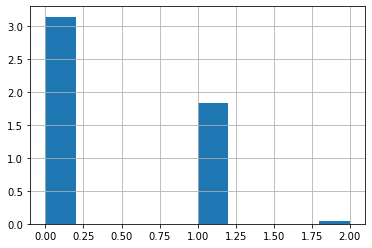

-----------------------------------------
BedroomAbvGr


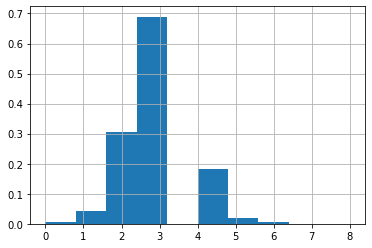

-----------------------------------------
KitchenAbvGr


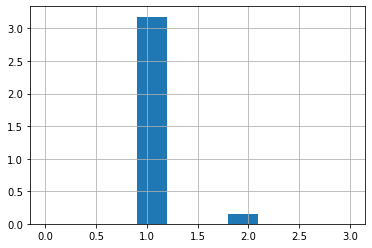

-----------------------------------------
TotRmsAbvGrd


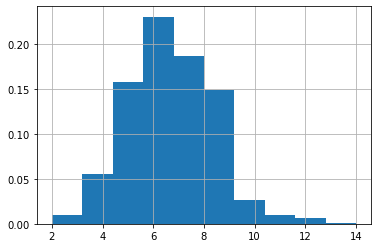

-----------------------------------------
Fireplaces


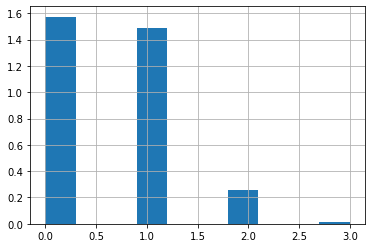

-----------------------------------------
GarageCars


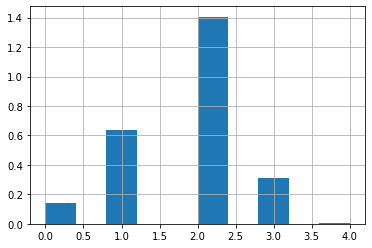

-----------------------------------------
GarageArea


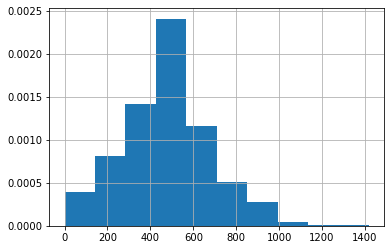

-----------------------------------------
WoodDeckSF


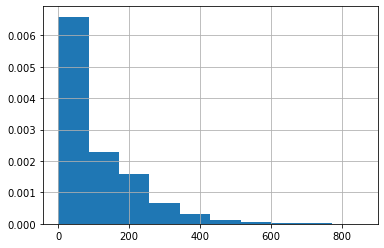

-----------------------------------------
OpenPorchSF


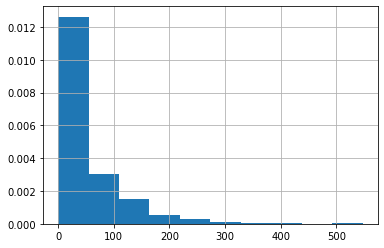

-----------------------------------------
EnclosedPorch


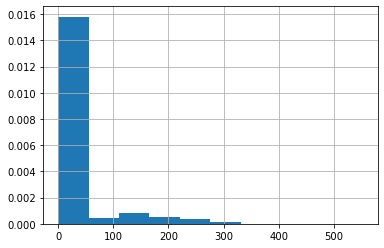

-----------------------------------------
3SsnPorch


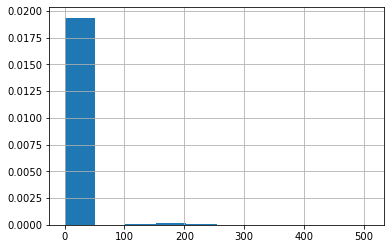

-----------------------------------------
ScreenPorch


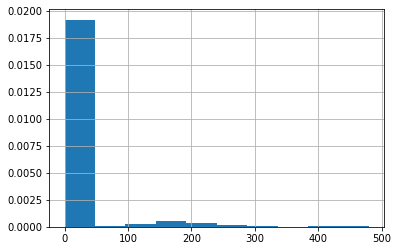

-----------------------------------------
PoolArea


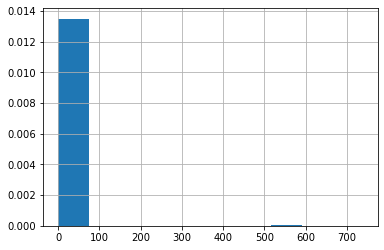

-----------------------------------------
MiscVal


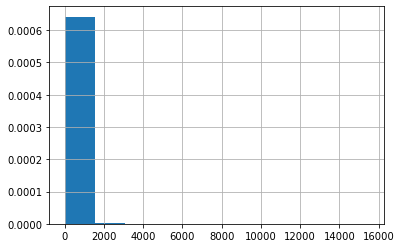

-----------------------------------------
MoSold


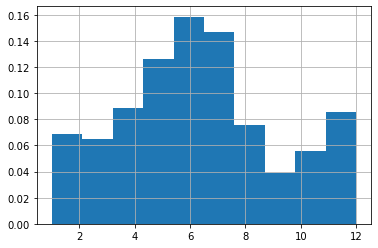

-----------------------------------------
YrSold


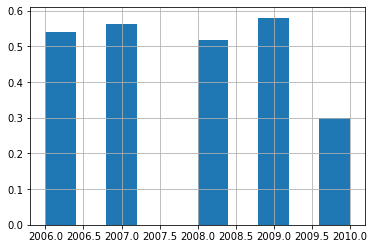

-----------------------------------------


In [19]:
for i in quantitatives:
    print(i)
    X[i].hist(density=True) # Crée l'histogramme
    plt.show() # Affiche l'histogramme
    print("-----------------------------------------")

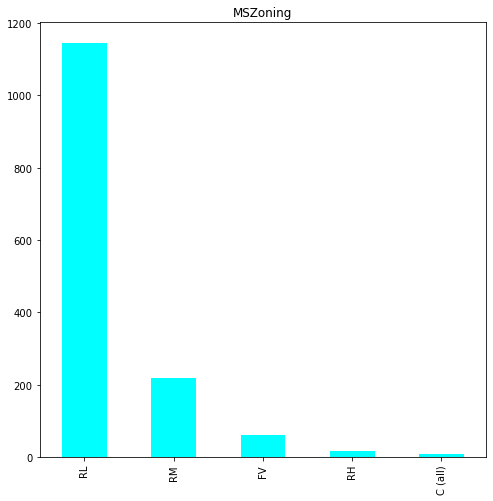

----------------------------------------



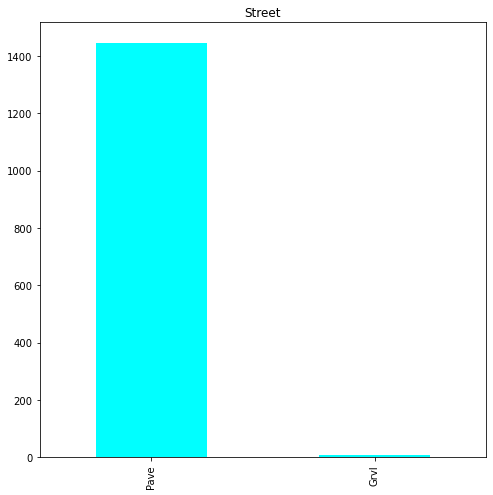

----------------------------------------



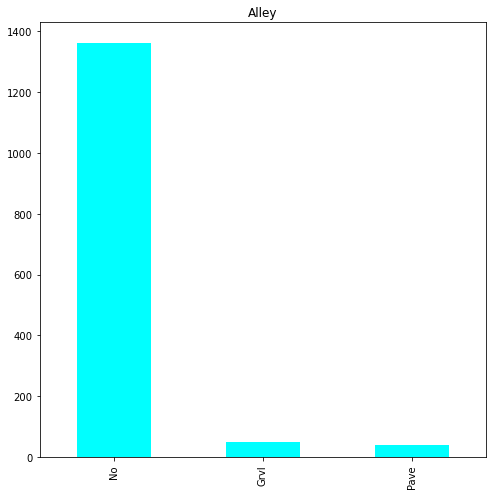

----------------------------------------



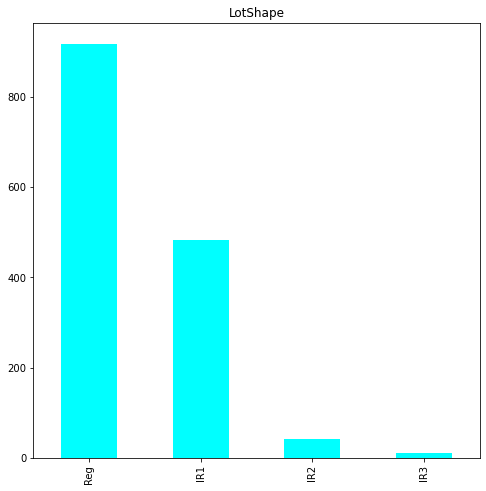

----------------------------------------



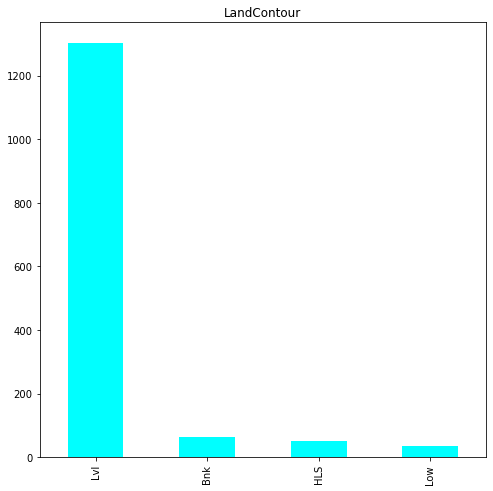

----------------------------------------



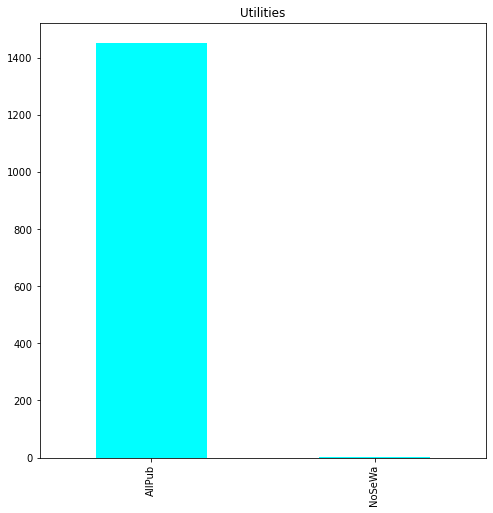

----------------------------------------



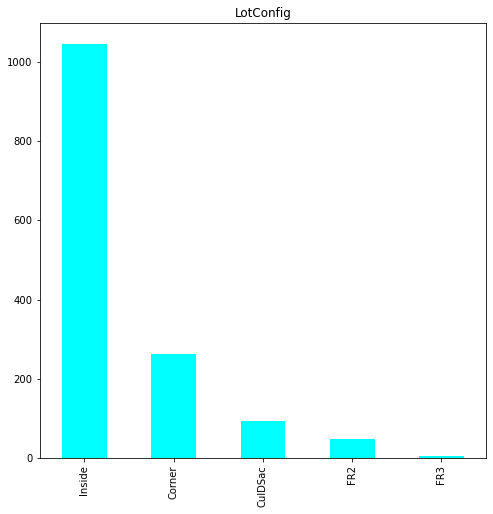

----------------------------------------



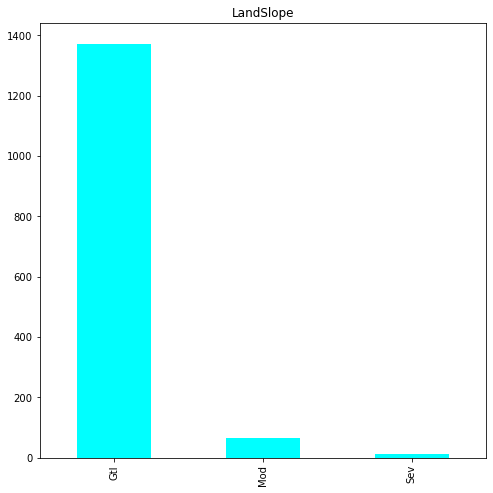

----------------------------------------



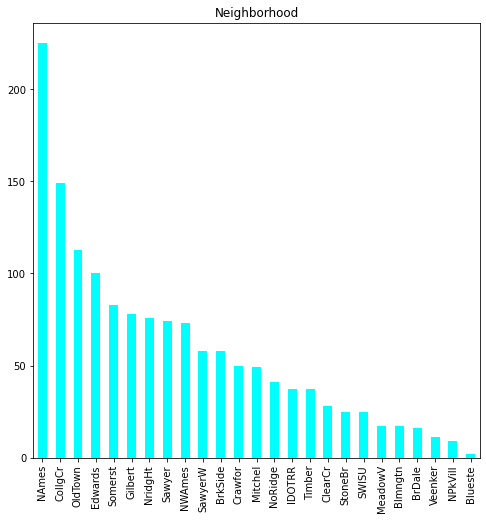

----------------------------------------



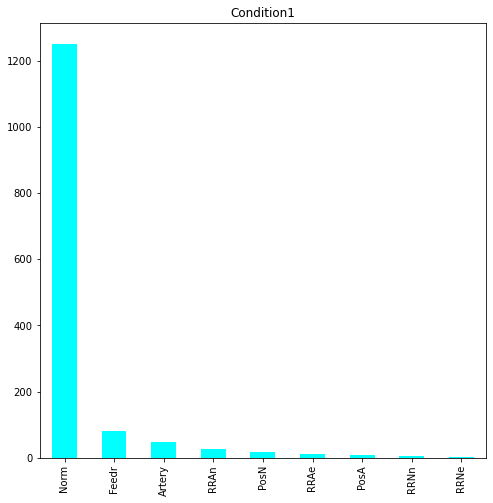

----------------------------------------



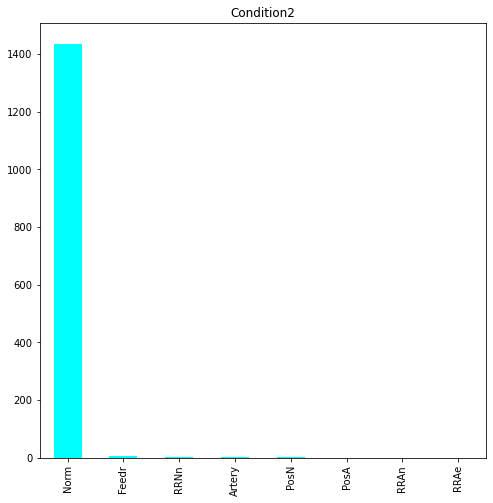

----------------------------------------



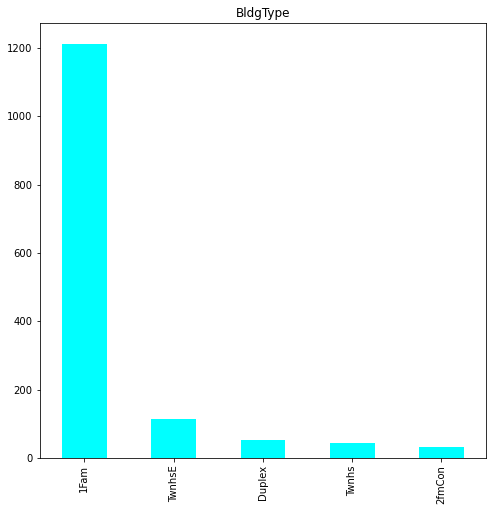

----------------------------------------



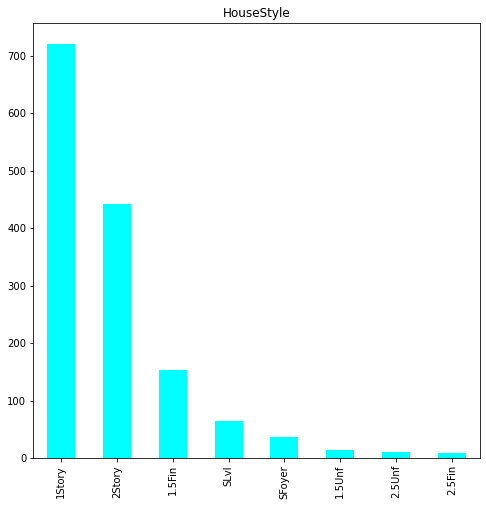

----------------------------------------



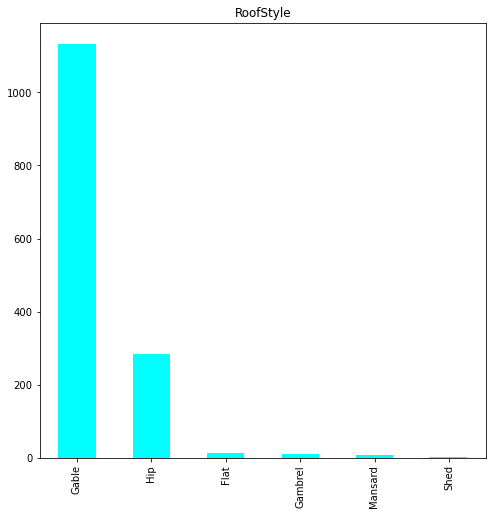

----------------------------------------



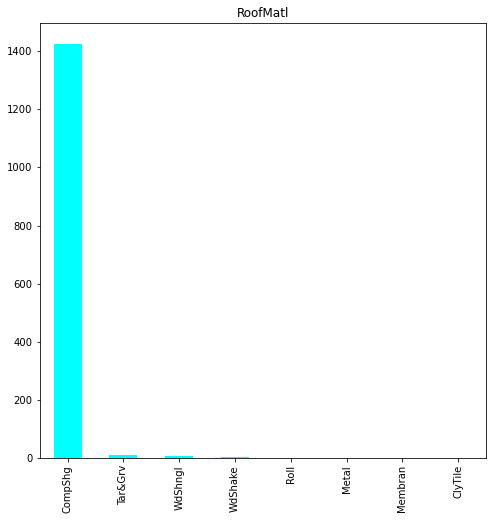

----------------------------------------



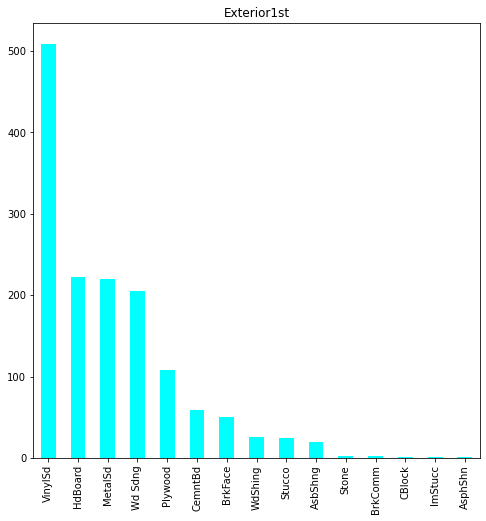

----------------------------------------



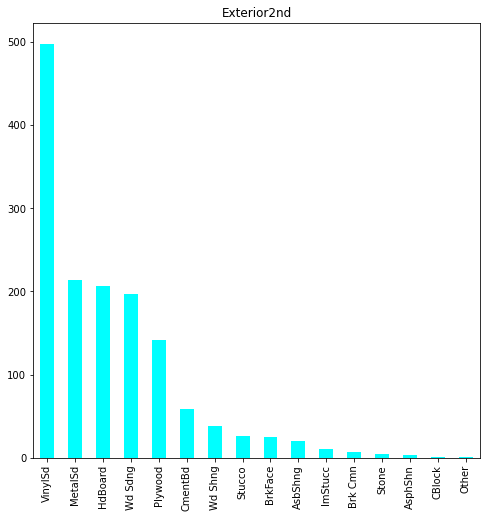

----------------------------------------



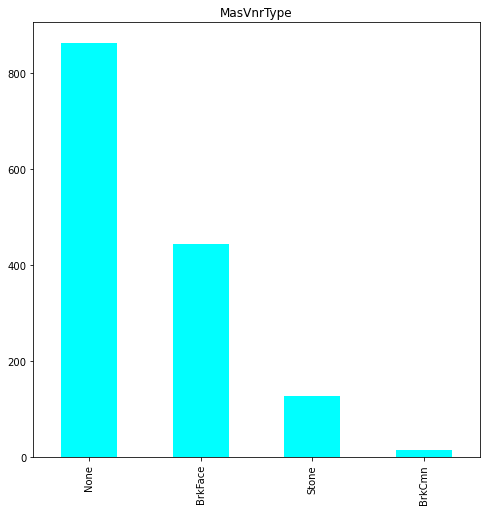

----------------------------------------



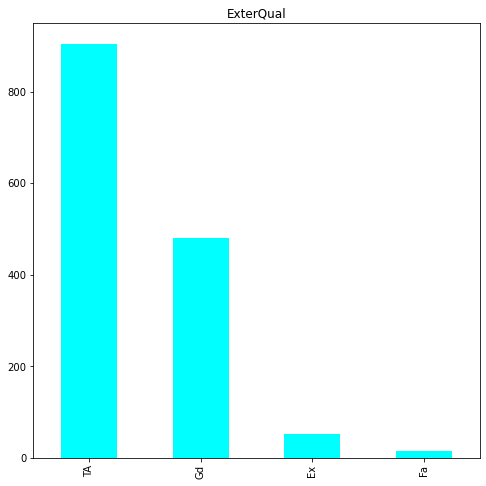

----------------------------------------



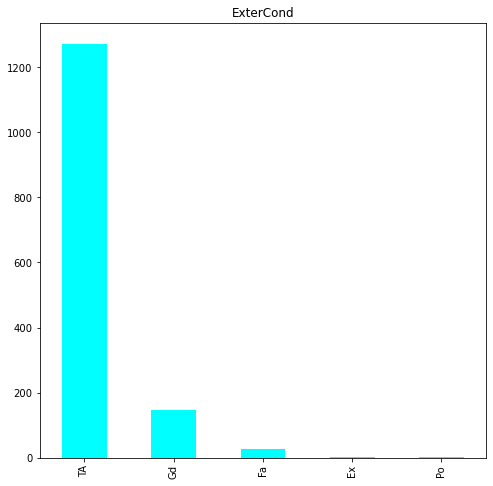

----------------------------------------



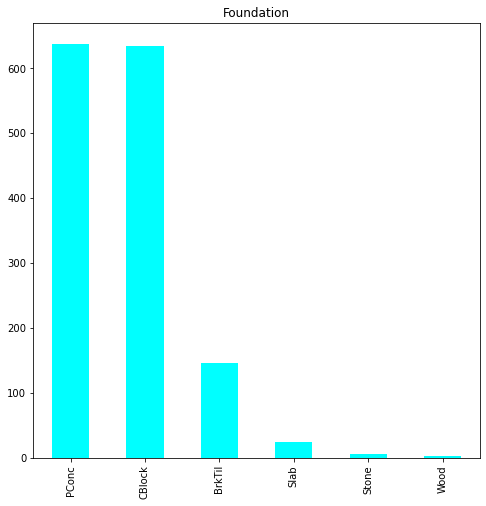

----------------------------------------



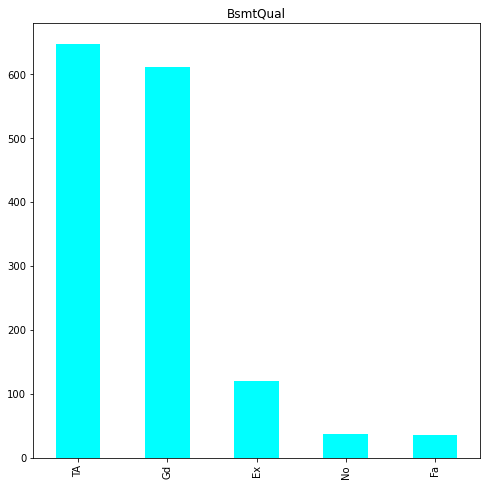

----------------------------------------



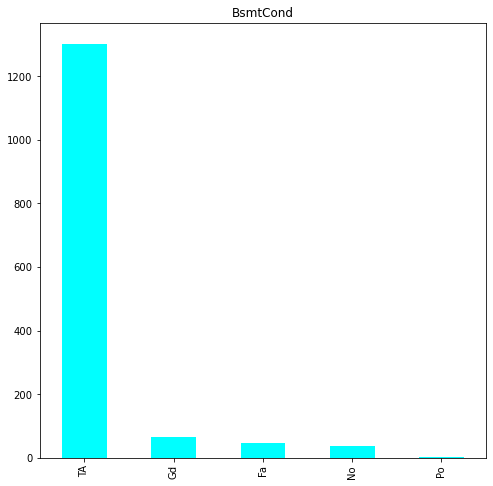

----------------------------------------



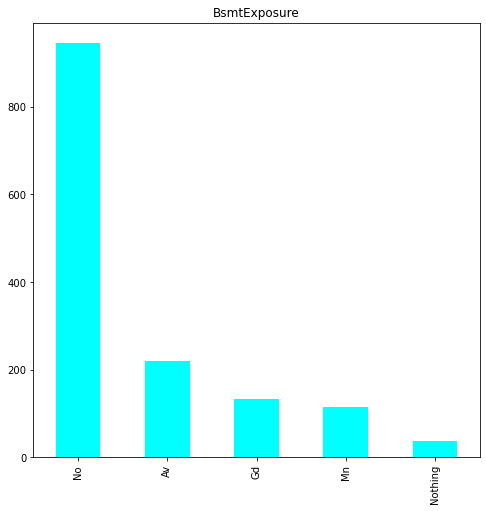

----------------------------------------



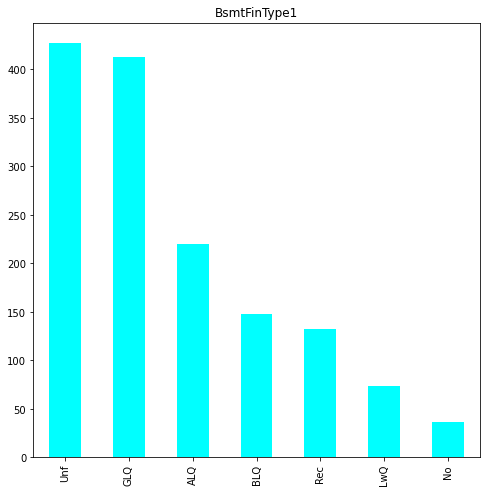

----------------------------------------



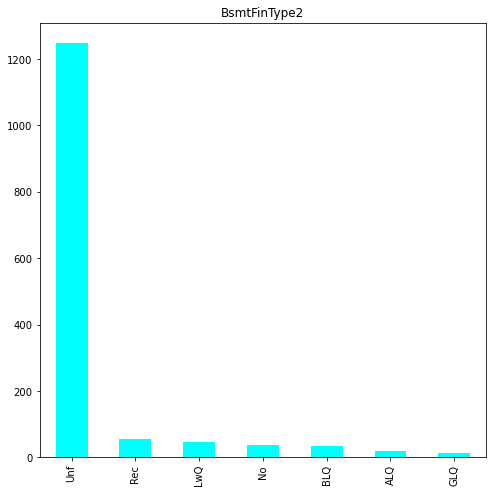

----------------------------------------



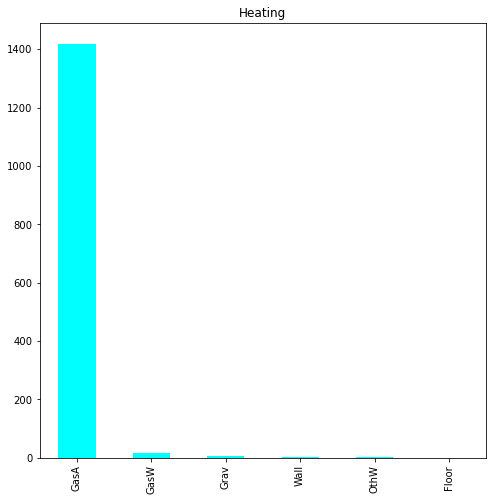

----------------------------------------



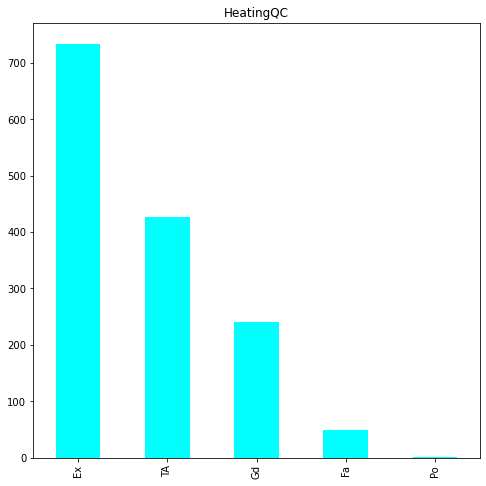

----------------------------------------



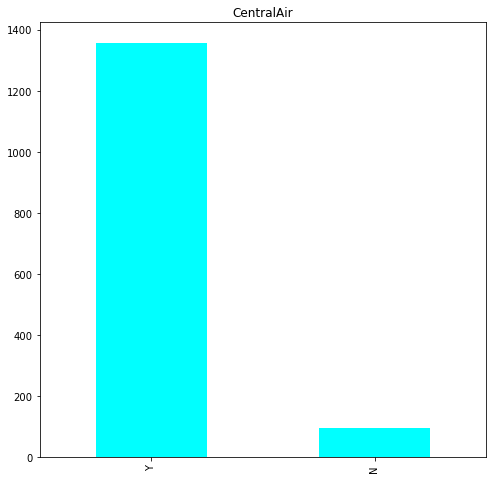

----------------------------------------



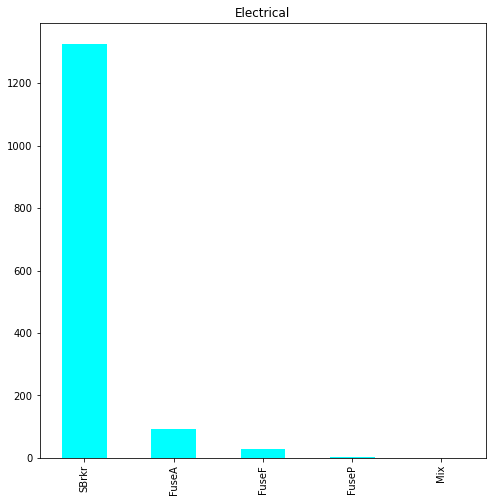

----------------------------------------



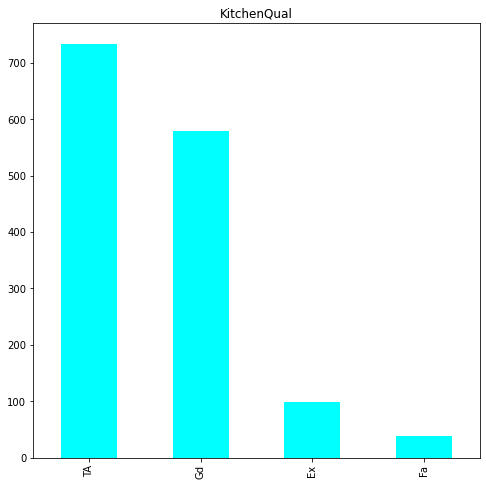

----------------------------------------



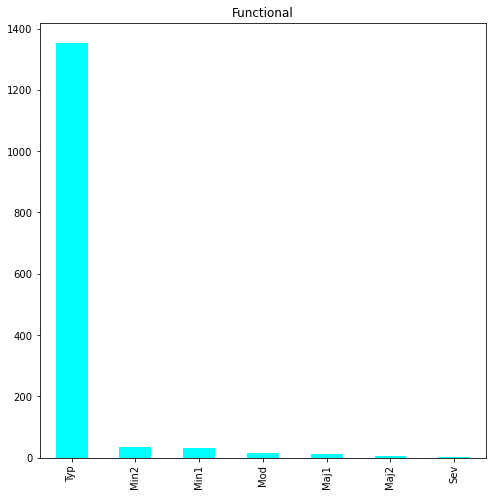

----------------------------------------



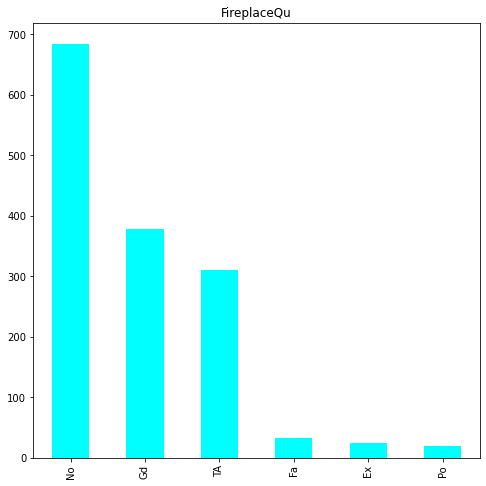

----------------------------------------



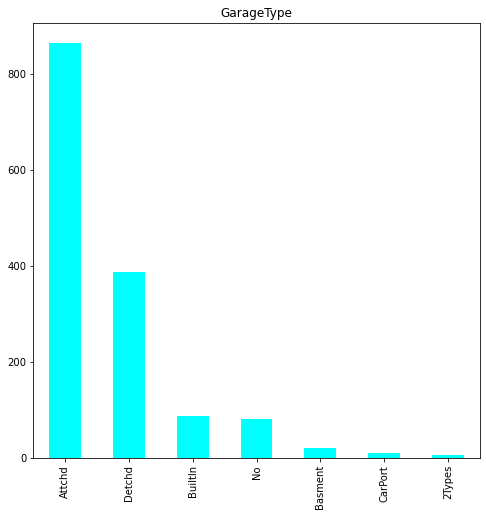

----------------------------------------



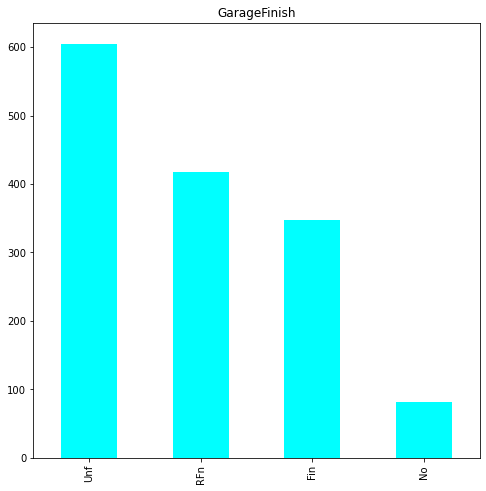

----------------------------------------



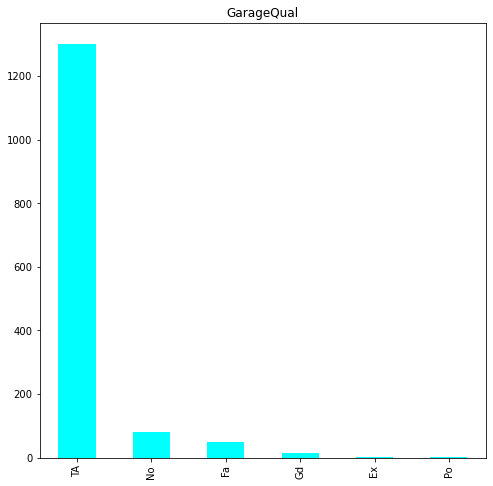

----------------------------------------



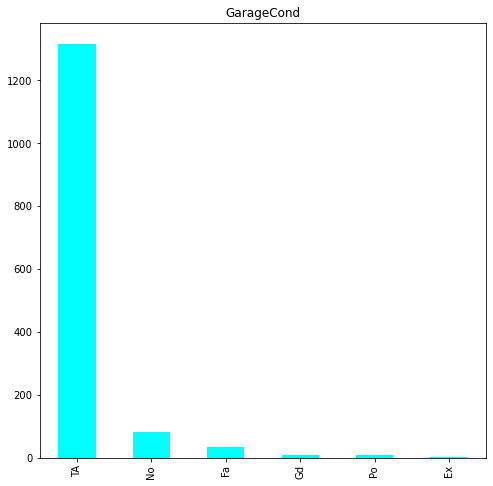

----------------------------------------



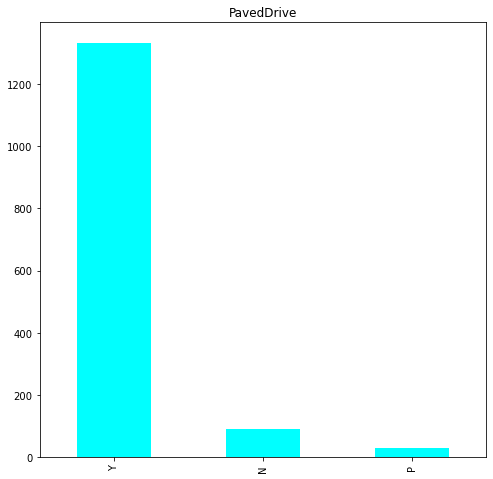

----------------------------------------



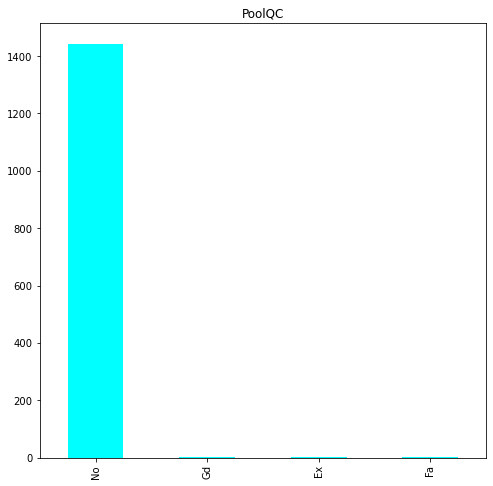

----------------------------------------



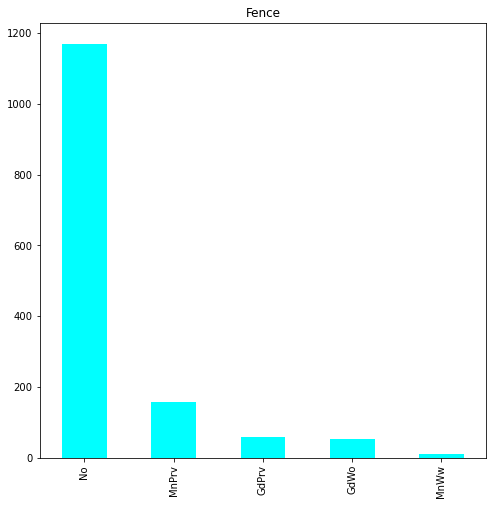

----------------------------------------



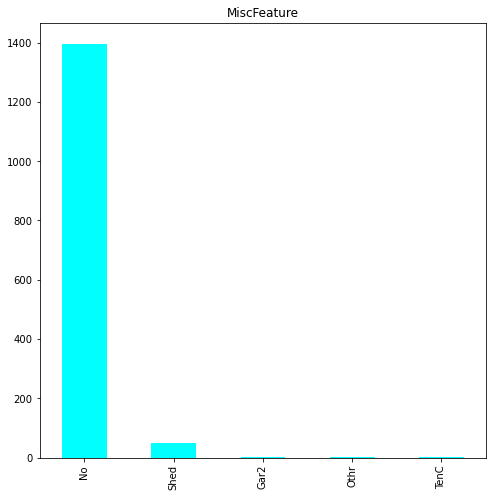

----------------------------------------



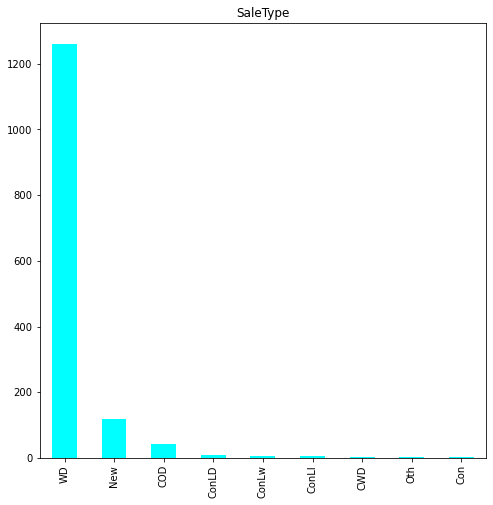

----------------------------------------



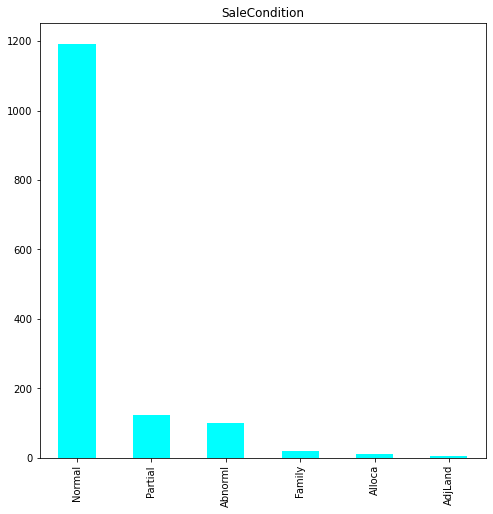

----------------------------------------



In [20]:
for i in categorielles:
    fig=plt.figure(figsize=(8,8))
    X[i].value_counts().plot.bar(subplots=True, color='cyan')
    plt.show()
    print("----------------------------------------\n")

In [189]:
#OneHotEncoding
encod=OneHotEncoder(sparse=False)
encod=pd.DataFrame(data=encod.fit_transform(X[categorielles]),columns=encod.get_feature_names())
#StandardScaler
ss=StandardScaler()
X[quantitatives]=ss.fit_transform(X[quantitatives])

X = pd.concat([X[quantitatives],encod], axis=1)

In [190]:
X

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,x41_ConLw,x41_New,x41_Oth,x41_WD,x42_Abnorml,x42_AdjLand,x42_Alloca,x42_Family,x42_Normal,x42_Partial
0,0.072441,-0.205996,0.656247,-0.520740,1.057250,0.883532,0.509503,0.579345,-0.289621,-0.943764,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872386,-0.090876,-0.067870,2.174601,0.162613,-0.424340,-0.573097,1.176868,-0.289621,-0.640635,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.072441,0.074297,0.656247,-0.520740,0.990980,0.835093,0.321705,0.096054,-0.289621,-0.301312,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.308648,-0.095881,0.656247,-0.520740,-1.858602,-0.714978,-0.573097,-0.497076,-0.289621,-0.061524,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.072441,0.375612,1.380365,-0.520740,0.957846,0.738213,1.360116,0.467309,-0.289621,-0.174632,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,0.072441,-0.259352,-0.067870,-0.520740,0.924711,0.738213,-0.573097,-0.971580,-0.289621,0.872745,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1447,-0.872386,0.266998,-0.067870,0.377707,0.228883,0.156937,0.084196,0.763874,0.718284,0.049321,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1448,0.308648,-0.146734,0.656247,3.073048,-0.997100,1.028852,-0.573097,-0.367466,-0.289621,0.700821,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1449,-0.872386,-0.079164,-0.791988,0.377707,-0.698888,0.544454,-0.573097,-0.863937,6.073166,-1.283087,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

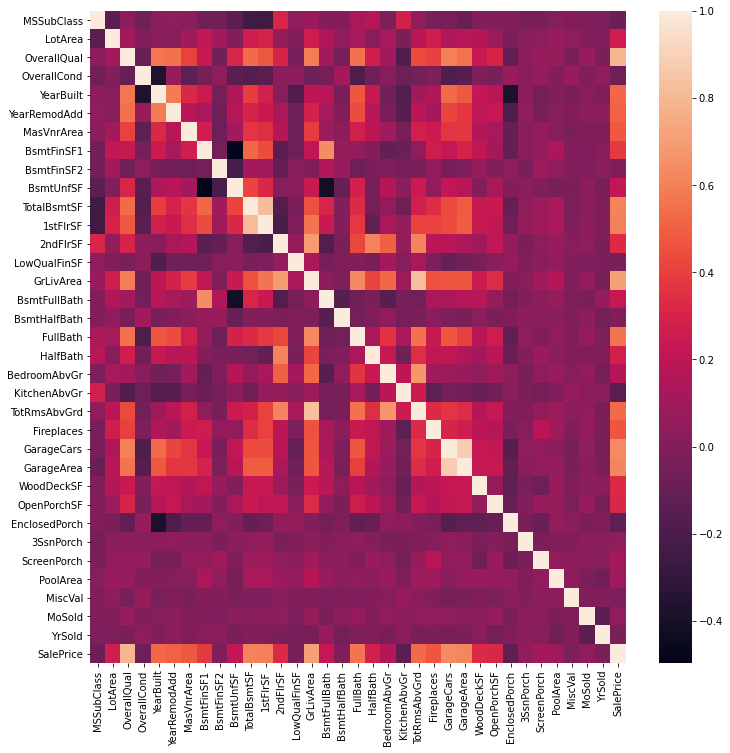

In [191]:
# On affiche la matrice de corrélation générale grace à heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(train.corr())

**test**

In [192]:
identifiants=test.Id

In [193]:
No=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageCond','GarageQual']
for i in No:
    test[i]=test[i].fillna("No")
    
test.BsmtExposure=test.BsmtExposure.fillna("Nothing")

test=test.drop(['GarageYrBlt','LotFrontage','Id'],axis=1)

In [194]:
quantitatives = test.select_dtypes(['int64','float64']).columns
categorielles= test.select_dtypes(['object']).columns

In [195]:
test[categorielles]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,No,MnPrv,No,WD,Normal
1,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,No,No,Gar2,WD,Normal
2,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,No,MnPrv,No,WD,Normal
3,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,No,No,No,WD,Normal
4,RL,Pave,No,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,No,No,No,No,Y,No,No,No,WD,Normal
1455,RM,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,No,No,No,WD,Abnorml
1456,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,No,No,No,WD,Abnorml
1457,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,No,No,No,No,Y,No,MnPrv,Shed,WD,Normal


In [196]:
((test[categorielles].isna().sum()/test[categorielles].shape[0])*100).sort_values(ascending=False)[:10]

MasVnrType     1.096642
MSZoning       0.274160
Functional     0.137080
Utilities      0.137080
SaleType       0.068540
Exterior2nd    0.068540
Exterior1st    0.068540
KitchenQual    0.068540
Heating        0.000000
HeatingQC      0.000000
dtype: float64

In [197]:
No2=['MasVnrType',
'MSZoning',
'Utilities',
'Functional',
'SaleType',
'Exterior2nd',
'Exterior1st',  
'KitchenQual'] 

for i in No2:
    test[i]=test[i].fillna("No")

In [198]:
quantitatives = test.select_dtypes(['int64','float64']).columns
categorielles= test.select_dtypes(['object']).columns

In [199]:
#OneHotEncoding
encod=OneHotEncoder(sparse=False)
encod=pd.DataFrame(data=encod.fit_transform(test[categorielles]),columns=encod.get_feature_names())
#StandardScaler
ss=StandardScaler()
test[quantitatives]=ss.fit_transform(test[quantitatives])

test = pd.concat([test[quantitatives],encod], axis=1)

imputer=KNNImputer(n_neighbors=3)
array=imputer.fit_transform(test)
test = pd.DataFrame(data=array, columns=test.columns)

In [200]:
X.shape

(1451, 300)

In [201]:
test.shape

(1459, 290)

In [202]:
print("Les colonnes suivantes sont présentent dans train et dans test:\n")
liste_colonnes=[]
for i in X.keys():
    if i in (test.keys()):
        liste_colonnes.append(i)
print(liste_colonnes)
print("- - - - - - - - -\n")
liste15=[]
print("Les colonnes suivantes sont présentent dans train mais pas dans test:\n")
for i in X.keys():
    if i not in (test.keys()):
        liste15.append(i)
print(liste15)
print("- - - - - - - - -\n")
liste16=[]
print("Les colonnes suivantes sont présentent dans test mais pas dans train:\n")
for i in test.keys():
    if i not in (X.keys()):
        liste16.append(i)
print(liste16)

Les colonnes suivantes sont présentent dans train et dans test:

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'x0_C (all)', 'x0_FV', 'x0_RH', 'x0_RL', 'x0_RM', 'x1_Grvl', 'x1_Pave', 'x2_Grvl', 'x2_No', 'x2_Pave', 'x3_IR1', 'x3_IR2', 'x3_IR3', 'x3_Reg', 'x4_Bnk', 'x4_HLS', 'x4_Low', 'x4_Lvl', 'x5_AllPub', 'x6_Corner', 'x6_CulDSac', 'x6_FR2', 'x6_FR3', 'x6_Inside', 'x7_Gtl', 'x7_Mod', 'x7_Sev', 'x8_Blmngtn', 'x8_Blueste', 'x8_BrDale', 'x8_BrkSide', 'x8_ClearCr', 'x8_CollgCr', 'x8_Crawfor', 'x8_Edwards', 'x8_Gilbert', 'x8_IDOTRR', 'x8_MeadowV', 'x8_Mitchel', 'x8_NAmes', 

In [203]:
X=X.drop(['x5_NoSeWa', 'x10_RRAe', 'x10_RRAn', 'x10_RRNn', 'x12_2.5Fin', 'x14_ClyTile', 'x14_Membran', 'x14_Metal', 'x14_Roll', 'x15_ImStucc', 'x15_Stone', 'x16_Other', 'x26_Floor', 'x26_OthW', 'x29_Mix', 'x35_Ex', 'x38_Fa', 'x40_TenC'],axis=1)
test=test.drop(['x0_No', 'x5_No', 'x15_No', 'x16_No', 'x17_No', 'x30_No', 'x31_No', 'x41_No'],axis=1)

In [204]:
X.shape

(1451, 282)

In [205]:
test.shape

(1459, 282)

In [ ]:
stop

**Modelisation**

In [ ]:
clf = RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [10,50,100,200,500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

clf = GridSearchCV(estimator=clf, param_grid=param_grid,cv = 2,n_jobs = -1,)
clf.fit(X, y.values.ravel())

In [ ]:
predictions=clf.predict(test)

In [ ]:
submission = pd.DataFrame({'Id': identifiants,'SalePrice':predictions})

In [ ]:
submission = pd.DataFrame({'Id': identifiants,'SalePrice':predictions})

In [ ]:
submission.to_csv('submission.csv',index=False)